# PySP开发测试区

## 0. 测试准备

### 0.1 测试环境导入

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt

### 0.2 测试数据生成

In [2]:
import numpy as np
fs = 1000.0
t = np.arange(0, 5, 1/fs)

# 多个谐波分量
harmonics = (
    2 * np.sin(2 * np.pi * 50 * t) +      # 50Hz
    1.5 * np.sin(2 * np.pi * 120 * t) +   # 120Hz
    np.sin(2 * np.pi * 250 * t)           # 250Hz
)

# 冲击序列
impulse = np.zeros_like(t)
impulse_indices = [200, 500, 700]
impulse[impulse_indices] = [5, -4, 6]

# 随机噪声冲击
random_impulse = np.zeros_like(t)
random_indices = np.random.choice(len(t), 5, replace=False)
random_impulse[random_indices] = np.random.uniform(-3, 3, size=5)

# 白噪声
white_noise = np.random.normal(0, 0.5, size=len(t))

# 合成信号
Data = harmonics + impulse + random_impulse + white_noise


## 1. Signal模块测试

### 1.1 Signal.Axis()

In [9]:
from PySP.Signal import Axis,t_Axis,f_Axis

try:
    axis = Axis(N=10000, dx=1/10000, name='t', unit='s')
    t_axis = t_Axis(N=10000, dt=1/10000, t0=0.0)
    f_axis = f_Axis(N=10000, df=0.1)
    print(axis)
    print(t_axis)
    print(f_axis)
except Exception as e:
    print(e)

Axis(t=[0.000e+00 1.000e-04 2.000e-04 ... 9.997e-01 9.998e-01 9.999e-01]s)
t_Axis(时间=[0.000e+00 1.000e-04 2.000e-04 ... 9.997e-01 9.998e-01 9.999e-01]s)
f_Axis(频率=[0.000e+00 1.000e-01 2.000e-01 ... 9.997e+02 9.998e+02 9.999e+02]Hz)


### 1.2 Signal.Series()

In [3]:
from PySP.Signal import Series

from PySP.Signal import Axis,t_Axis

try:
    t_axis = t_Axis(N=5000, dt=1/1000, t0=0.0)
    s = Series(axis=t_axis, data=Data, name="幅值", unit="v")
    print(s)
except Exception as e:
    print(e)

Series(幅值=[ 0.02182749  2.54970515  1.71166944 ... -1.42538859 -3.43437418
 -2.60960841]v, t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 4.997e+00 4.998e+00 4.999e+00]s))


### 1.1 Signal.Signal()

Signal(data=[ 0.0750261   2.89915933  2.90305192 ... -1.62952846 -1.76555778
 -3.08204488], fs=1000.0, label=测试信号)


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:136: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


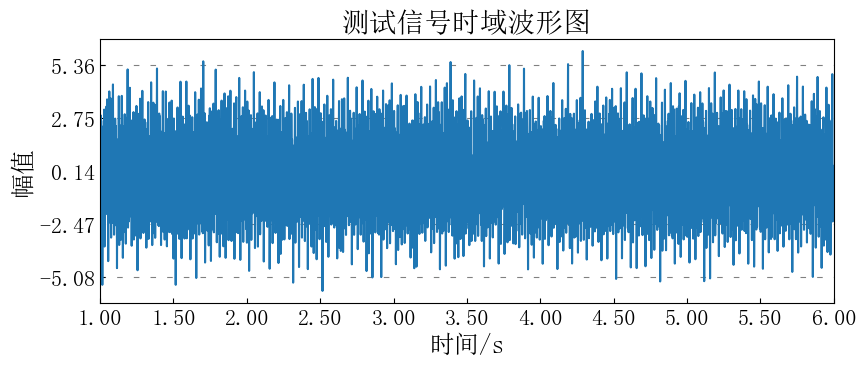

In [3]:
from PySP.Signal import Signal

try:
    Sig = Signal(Data,fs=fs, label="测试信号",t0=1.0)
    print(repr(Sig))
    Sig.plot()
except Exception as e:
    print(e)

### 1.2 Signal.Resample()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:136: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:136: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:136: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:136: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Signal(data=[ 0.289826    2.44770024  2.85616725 ... -1.35065509 -2.37972197
 -3.5736874 ], fs=1000.0, label=测试信号)
Signal(data=[ 0.289826    2.44770024  2.85616725 ... -1.35065509 -2.37972197
 -3.5736874 ], fs=1000.0, label=测试信号)
Signal(data=[ 0.289826    2.44770024  2.85616725 ... -1.35065509 -2.37972197
 -3.5736874 ], fs=1000.0, label=测试信号)


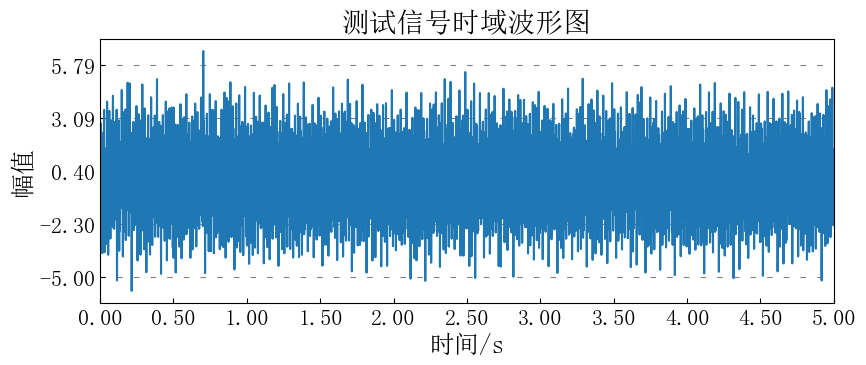

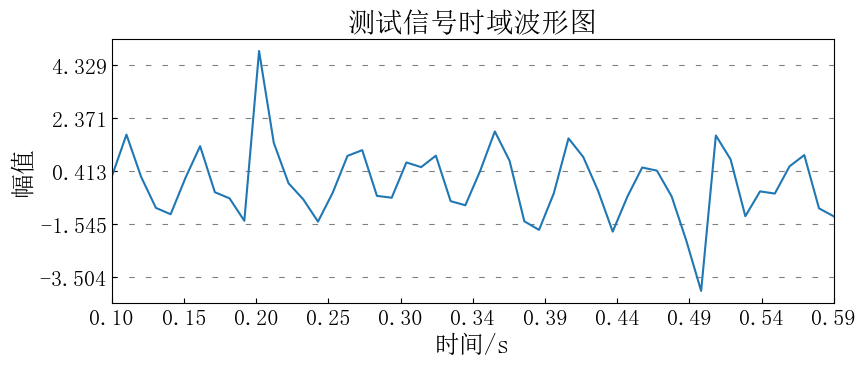

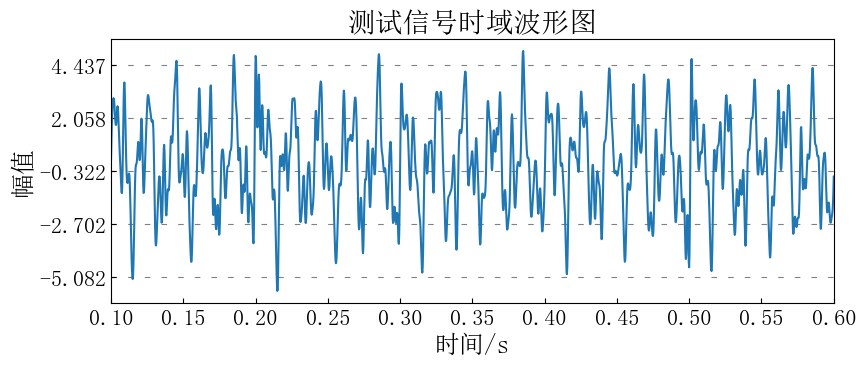

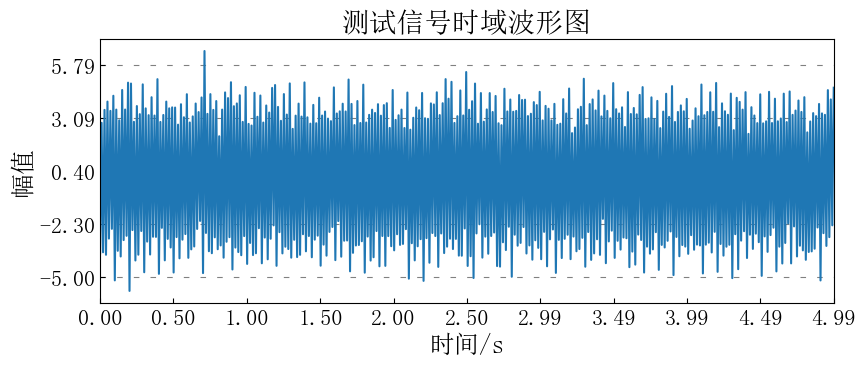

In [4]:
from PySP.Signal import Resample

from PySP.Signal import Signal

try:
    Sig = Signal(data=Data,fs=fs,label='测试信号')
    Sig.plot()
    _Sig=Resample(Sig=Sig,fs_resampled=100.0,t0=0.1,T=0.5)
    _Sig.plot()
    print(Sig)
    _Sig=Resample(Sig=Sig,type='fft',fs_resampled=4000.0,t0=0.1,T=0.5)
    _Sig.plot()
    print(Sig)
    _Sig=Resample(Sig=Sig,type='extreme',fs_resampled=100.0)
    _Sig.plot()
    print(Sig)
except Exception as e:
    print(e)

### 1.3 Signal.Periodic()

Signal(data=[0.3808515  1.05335922 2.03432032 ... 1.77285025 0.20842559 1.86507648], fs=1000.0, label=仿真含噪准周期信号)


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:136: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


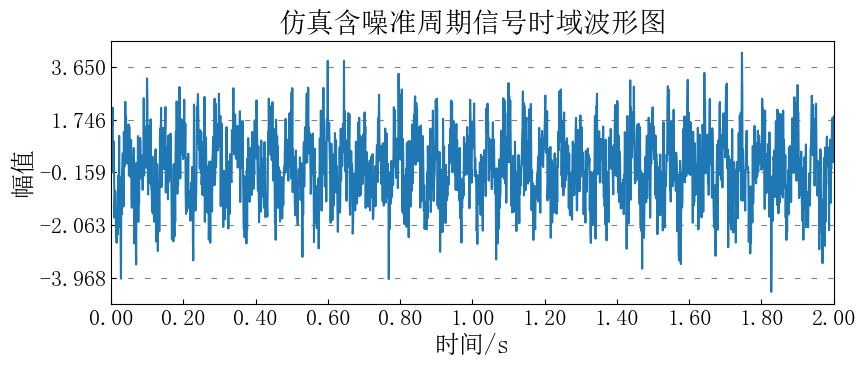

In [5]:
from PySP.Signal import Periodic

try:
    Sig = Periodic(fs=1000.0,T=2.0,CosParams=((20,1,32),(50,0.5,0)),noise=1.0)
    print(repr(Sig))
    Sig.plot()
except Exception as e:
    print(e)

## 2. Plot模块测试

### 2.1 Plot.Plot()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\core.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.figure.show()


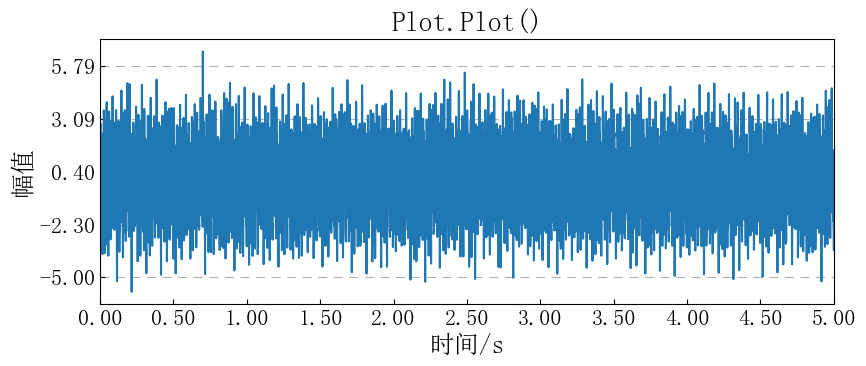

In [6]:
from PySP.Plot import Plot
from PySP.Signal import Signal

try:
    Sig = Signal(data=Data, fs=fs, label="测试信号")

    class TestPlot(Plot):

        def plot(self, Sig: 'Signal', **kwargs):

            def _draw_plot(ax, data):
                ax.plot(data.t_Axis, data.data, label=data.label)

            task_kwargs = self.kwargs
            task_kwargs.update(kwargs)

            task = {
                "data": Sig,
                "kwargs": task_kwargs,
                "plot_function": _draw_plot,
                "plugins": [], 
            }
            self.tasks.append(task)
            return self
            
    test=TestPlot(
        xlabel="时间/s",
        ylabel="幅值",
        title="Plot.Plot()",
    ).plot(Sig).show()
except Exception as e:
    print(e)

### 2.2 Plot.LinePlot()

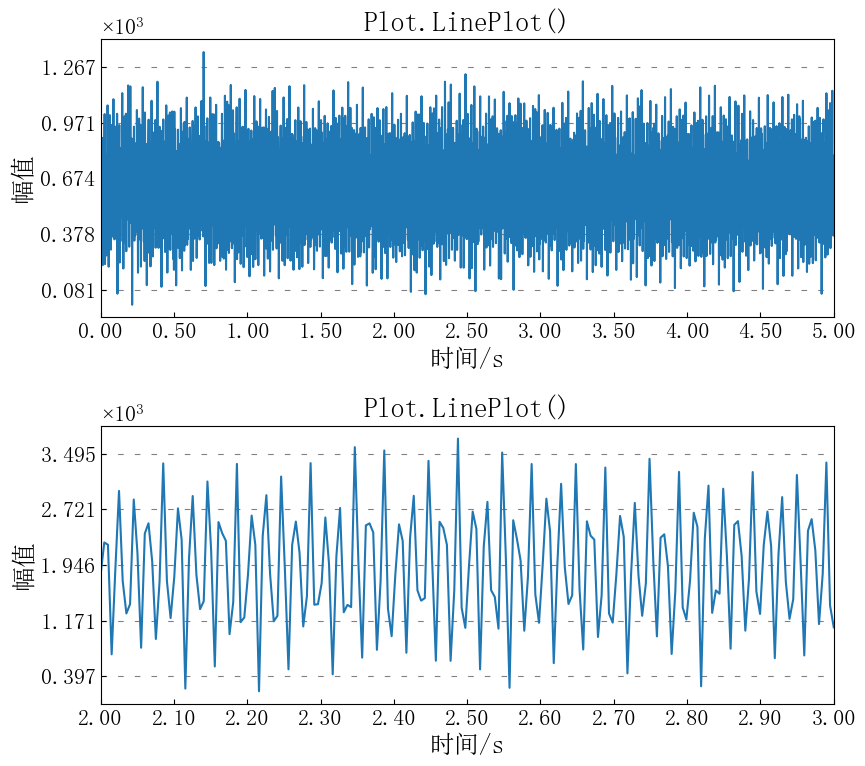

In [9]:
from PySP.Plot import LinePlot

from PySP.Signal import Signal
from PySP.Signal import Resample
import matplotlib.pyplot as plt

try:
   Sig1 = Signal(data=(Data-np.min(Data)+1e-3), fs=fs, label="测试信号1")*110
   Sig2 = (Sig1 + 2) * 3+10
   Sig2.label = "测试信号2"
   Sig2 = Resample(Sig=Sig2, fs_resampled=200.0, t0=2.0, T=1.0)
   Plot = LinePlot(
      isSampled=True, title="Plot.LinePlot()"
   )
   Plot.TimeWaveform(Sig1,ybins=7)
   Plot.TimeWaveform(Sig2)
   Plot.show(pattern='return')
   plt.show()
except Exception as e:
    print(e)

### 2.3 Plot.PeakfinderPlugin()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\core.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.figure.show()


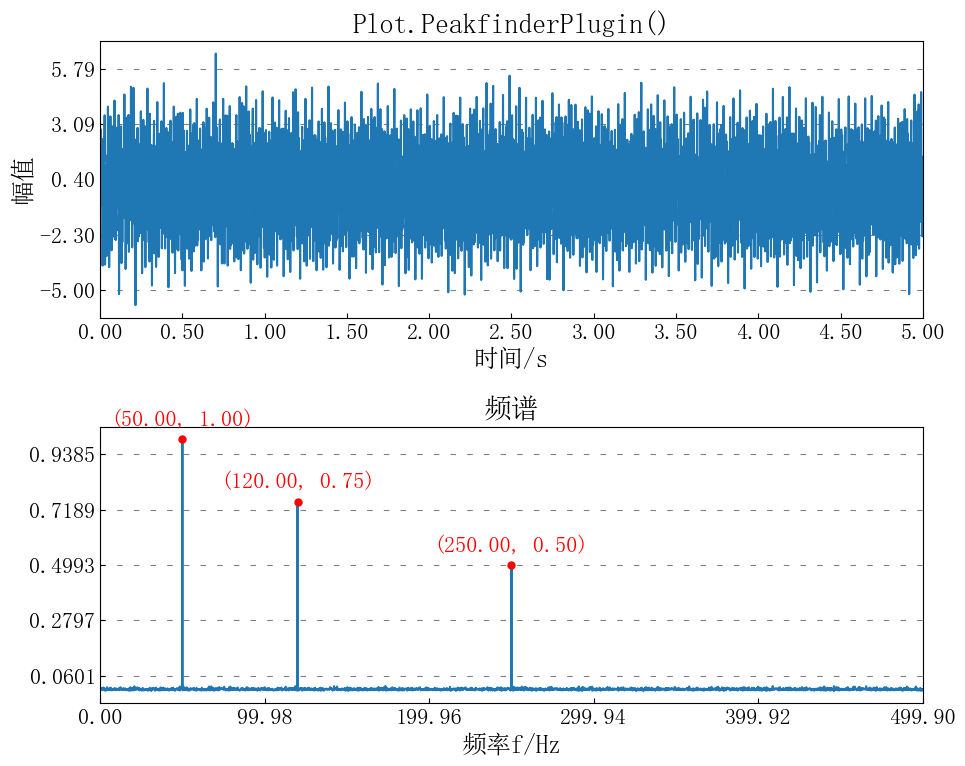

In [16]:
from PySP.Plot import PeakfinderPlugin

from PySP.Signal import Signal
from scipy.fftpack import fft

try:
   Sig1 = Signal(data=Data, fs=fs, label="测试信号")
   Plot=LinePlot(isSampled=True,figsize=(10,4), title="Plot.PeakfinderPlugin()")
   Plot.TimeWaveform(
      Sig1
   )
   F_x=np.abs(fft(Sig1.data))/Sig1.N
   Plot.Spectrum(Sig1.f_Axis(),F_x)
   Plot.set_params_to_task(xlabel="频率f/Hz",xlim=(0,500),title="频谱")
   Plot.add_plugin_to_task(PeakfinderPlugin(distance=50,prominence=0.1))
   Plot.show()
except Exception as e:
   print(e)

## 3. Analysis模块测试

### 3.1 Analysis.Analysis()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:153: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:136: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


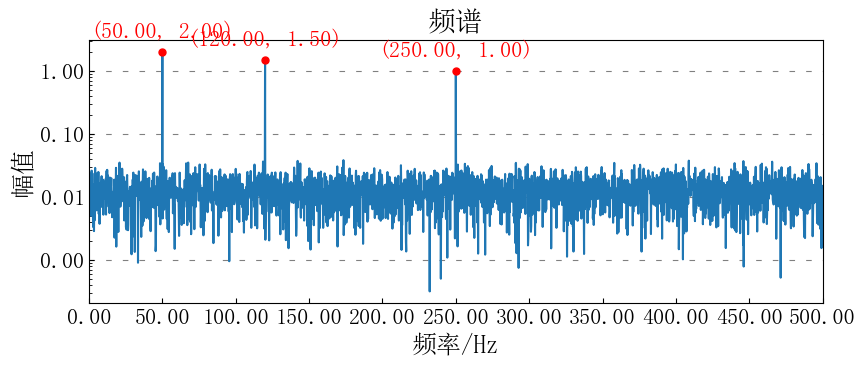

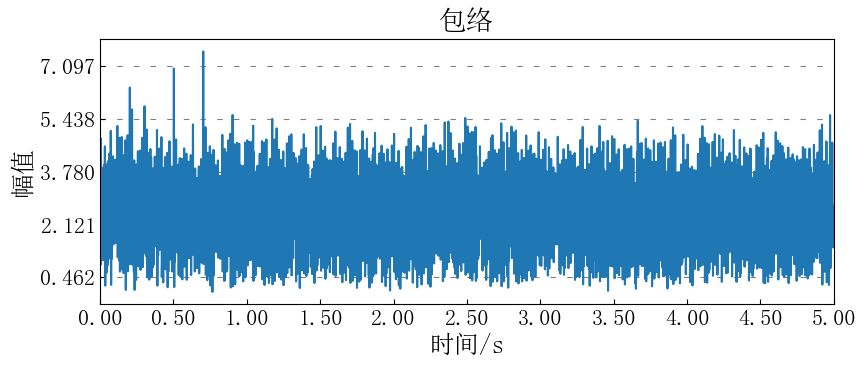

In [17]:
from PySP.Analysis import Analysis

from PySP.Signal import Signal
from PySP.Plot import TimeWaveformFunc, FreqSpectrumFunc
from scipy.signal import hilbert
try:
    class TestAnalysis(Analysis):
        @Analysis.Plot(TimeWaveformFunc)
        def envelope(self):
            """包络分析"""
            analytic_signal = hilbert(self.Sig.data)
            amplitude_envelope = np.abs(analytic_signal)
            return Signal(data=amplitude_envelope, fs=self.Sig.fs, label="包络信号", t0=self.Sig.t0)
        
        @Analysis.Plot(FreqSpectrumFunc)
        def fft(self):
            """FFT频谱分析"""
            N = self.Sig.N
            Y = np.fft.fft(self.Sig.data)
            P2 = np.abs(Y / N)  # 双边频谱
            P1 = P2[: N // 2 + 1]  # 单边频谱
            P1[1:-1] = 2 * P1[1:-1]
            f = self.Sig.fs * np.arange(0, (N / 2 + 1)) / N
            return f, P1
        
    Sig = Signal(data=Data, fs=fs)
    analysis=TestAnalysis(
        Sig,
        isPlot=True,
        title="频谱",
    )
    analysis.fft()
    analysis.plot_kwargs['title']="包络"
    analysis.envelope()

except Exception as e:
    print(e)

## 3.SpectrumAnalysis模块测试

### 3.1 SpectrumAnalysis.window()

Signal(data=[0. 0. 0. ... 0. 0. 0.], fs=1000.0, label=汉宁窗)


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:136: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


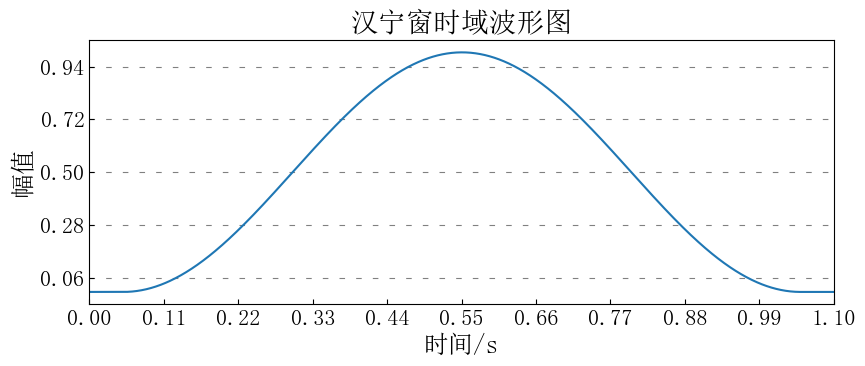

In [18]:
from PySP.Analysis import window

from PySP.Signal import Signal
try:
    data=window(type="汉宁窗",num=1000,padding=50)
    res=Signal(data=data,fs=1000.0,label="汉宁窗")
    print(res)
    res.plot()
except Exception as e:
    print(e)

### 3.2 SpectrumAnalysis.SpectrumAnalysis()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:153: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:153: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


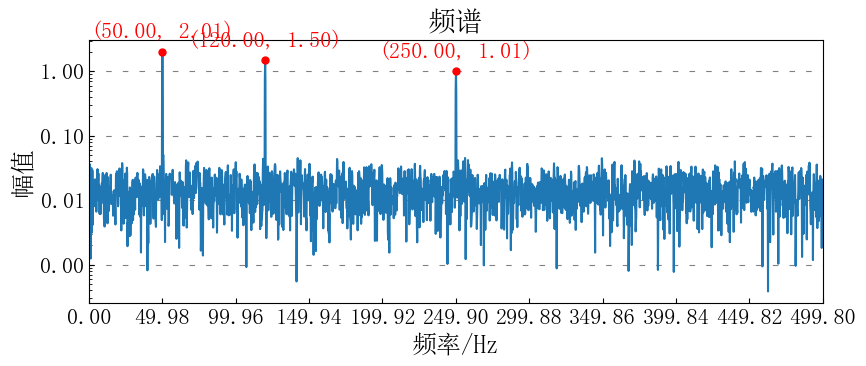

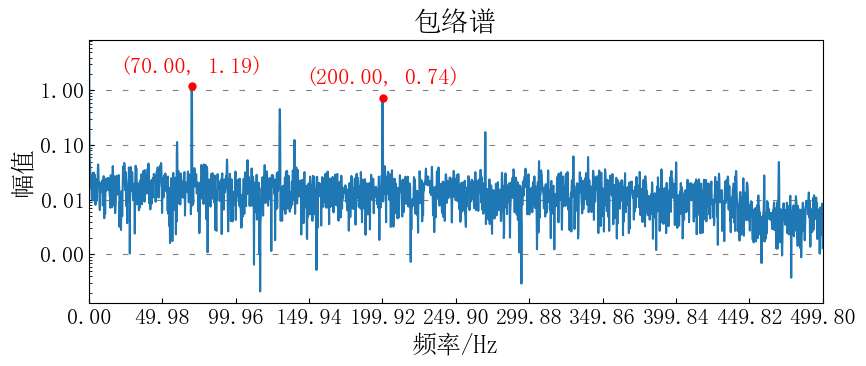

In [19]:
from PySP.Analysis import SpectrumAnalysis

from PySP.Signal import Signal

try:
    Sig = Signal(data=Data, fs=fs, label="测试信号")
    analysis=SpectrumAnalysis(
        Sig,
        isPlot=True,
        title="频谱",
    )
    analysis.cft()
    analysis.plot_kwargs['title']="包络谱"
    analysis.enve_spectra()
except Exception as e:
    print(e)